In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [3]:
iris = load_iris(as_frame=True)

In [4]:
x=iris.data

In [5]:
y=iris.target

In [7]:
# Combine into a single DataFrame
df = x.copy()
df["species"] = y.map(dict(enumerate(iris.target_names)))

In [8]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [9]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [11]:
df['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [12]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

<Axes: >

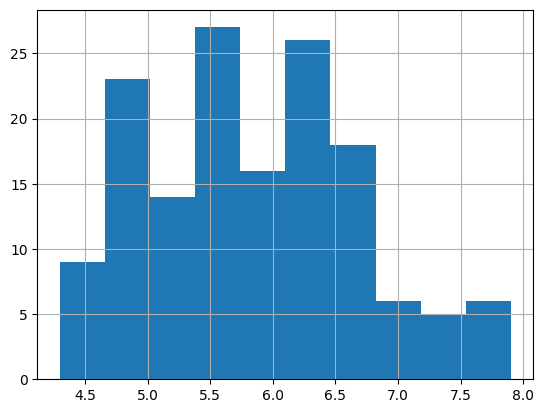

In [13]:
df['sepal length (cm)'].hist()

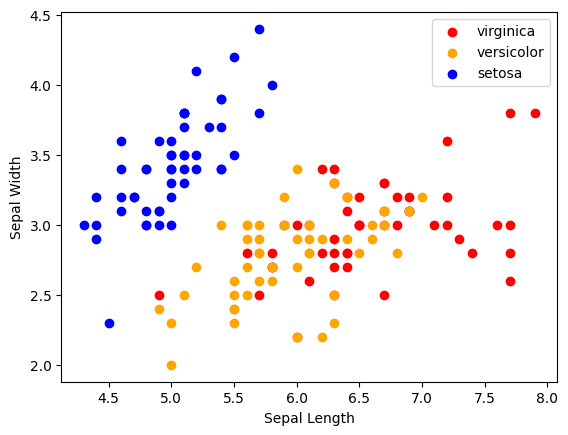

In [15]:
colors = ['red','orange','blue']
species = ['virginica','versicolor','setosa']
for i in range(3):
    x = df[df['species'] == species[i]]
    plt.scatter(x['sepal length (cm)'],x['sepal width (cm)'],c= colors[i],label=species[i])
    plt.xlabel("Sepal Length")
    plt.ylabel("Sepal Width")
    plt.legend()

In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['species'] = le.fit_transform(df['species'])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [18]:
x = df.drop(columns=['species'])
y = df['species']
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.30)

In [20]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [22]:
model.fit(x_train, y_train)

LogisticRegression()

In [24]:
print("Accuracy: ", model.score(x_test,y_test) * 100)

Accuracy:  88.88888888888889


In [29]:
# Predicition
y_pred = model.predict(x_test)

print("Accuracy: ", accuracy_score(y_test,y_pred))

#Classification report (labels inferred from y_test)
print("\nClassification Report:")
print(classification_report(y_test,y_pred))

cm = confusion_matrix(y_test, y_pred, labels=sorted(y_test.unique()))
print("\nConfusion Matrix (rows=true, cols=pred):")
print(pd.DataFrame(cm, index=sorted(y_test.unique()),columns=sorted(y_test.unique())))

Accuracy:  0.8888888888888888

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.79      0.85      0.81        13
           2       0.87      0.81      0.84        16

    accuracy                           0.89        45
   macro avg       0.88      0.89      0.88        45
weighted avg       0.89      0.89      0.89        45


Confusion Matrix (rows=true, cols=pred):
    0   1   2
0  16   0   0
1   0  11   2
2   0   3  13


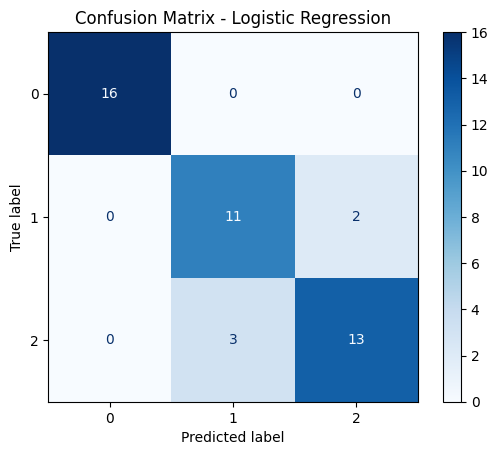

In [30]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# compute CM using your true/predicted labels
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(values_format='d', cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

In [31]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [33]:
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [34]:
y_pred = model.predict(x_test)

print("Accuracy:", accuracy_score(y_test,y_pred))
##
#Classification report (labels inferred from y_test)
print("\nClassification Report:")
print(classification_report(y_test,y_pred))

Accuracy: 0.8666666666666667

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.77      0.77      0.77        13
           2       0.81      0.81      0.81        16

    accuracy                           0.87        45
   macro avg       0.86      0.86      0.86        45
weighted avg       0.87      0.87      0.87        45



In [36]:
print("Accuracy: ", model.score(x_test,y_test) * 100)##

Accuracy:  86.66666666666667


In [ ]:
##

In [ ]:
from sl=klearn.ensemble import RandomForestClassifier
print("Accuracy: ",model.score)##